# Calculamos los redshifts fotometricos 
# Precision
# Datos que utilice para obtenerlo
# Con que datos los comparamos si es correcto o no
# Para eso tenemos el plot de dispersion
# Si esta sobre una linea es excelente correspondencia
# No encontramos una linea
# Maravilloso como una primera aproximacion

# 5. Exercises

## 5.1 Play with the distances and densities

### 1. Using Python, write a program to plot the Hubble function depending on the redshift (up to z=1) for the values $\Omega_m = 0.3$, $\Omega_\lambda = 0.7$, $\Omega_R = 0 $

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
#Defining our three omegas
omega_mass = 0.3 
omega_lambda= 0.7
omega_radiation = 0

lightspeed_kms = 299792                        # Lightspeed (km/s)
hubble_0 = 70                                  # Hubble parameter for z=0 (km/s/Mpc)

#z = np.random.rand(100)
#z = np.arange(0,1,0.01)
z = np.arange(0,3.01,0.01)

In [3]:
def hubble_function(z):
    return hubble_0 * np.sqrt( omega_mass*(1+z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

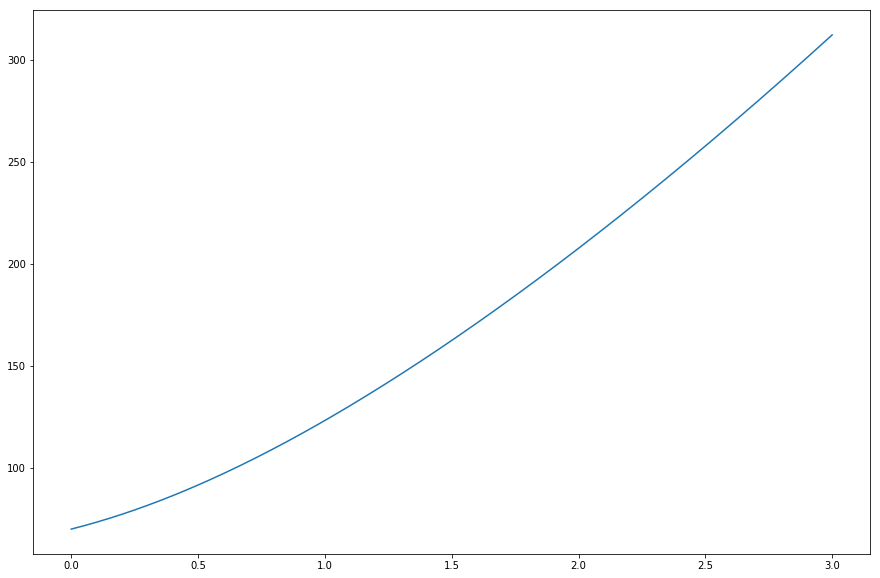

In [293]:
plt.figure(figsize=(15,10))
plt.plot(z,hubble_function(z))
plt.show()

### 2. Using this result, calculate the comoving distance $\chi(z)$, the luminosity distance $D_L(z)$ and the angular distance $D_A(z)$ for redshift between 0 and 1 with a step $\Delta(z) = 0.01$ . Plot the 3 curves on a same figure

In [5]:
from scipy import integrate

In [6]:
hubble_distance = lightspeed_kms / hubble_0    # Hubble Distance (Mpc)

def distance_integrand(z):
    return 1. / np.sqrt(omega_mass * (1. + z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

In [7]:
comoving_distance = np.zeros(len(z))
luminosity_distance = np.zeros(len(z))
angular_distance = np.zeros(len(z))

for i in range (len(z)):
    comoving_distance[i] = hubble_distance * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    luminosity_distance[i] = hubble_distance * (1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    angular_distance[i] = hubble_distance * 1./(1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]

### 3. Once it works, do the same for redshift up to 3. What do you remark for the angular distance? 

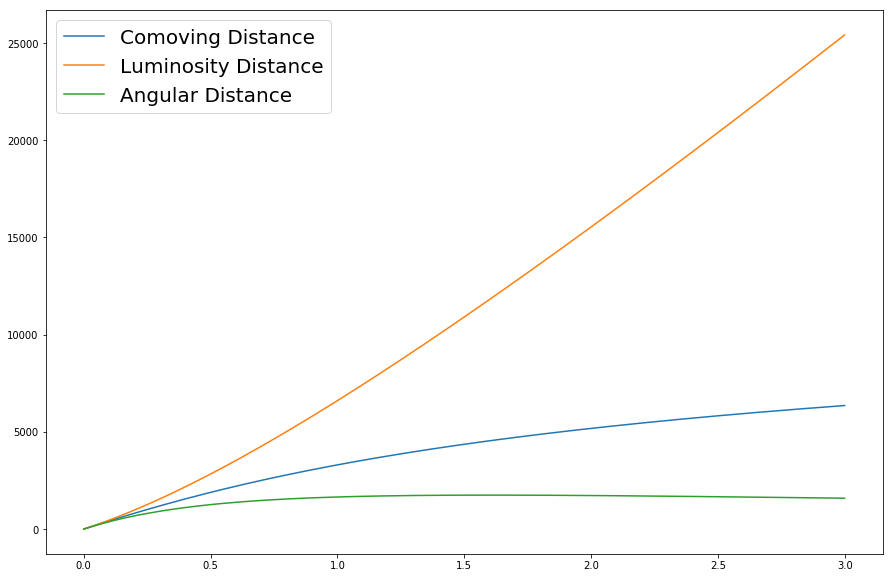

In [292]:
plt.figure(figsize=(15,10))
plt.plot(z, comoving_distance, label='Comoving Distance')
plt.plot(z, luminosity_distance, label='Luminosity Distance')
plt.plot(z, angular_distance, label='Angular Distance')



plt.legend(fontsize=20)
plt.show()

## 5.2 Play with the data 

### 1. Using the notebook examples (using astro_query.sdss method), get the magnitudes in u,g,r,i and z band of SDSS for red galaxies. We want to get the spectroscopic redshift for these objects too. We will use a radius of 40 arcminutes in order to have enough galaxies.

In [9]:
from astroquery.sdss import SDSS      
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits

/usr/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [10]:
radius_multiplier = 40

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
ixid = SDSS.query_region(pos, spectro=True, radius=radius_multiplier*u.arcmin)

print ixid

       ra              dec               objid        ... run2d  instrument
---------------- ---------------- ------------------- ... ------ ----------
1.61345998669356 14.5968871443635 1237656495114354962 ... v5_7_0       BOSS
2.03300176115533 14.2465654883938 1237656494577680703 ... v5_7_0       BOSS
2.43364775798113 14.3296173895275 1237656494577811647 ... v5_7_0       BOSS
2.58213979126106 14.7943724790583 1237652943176401017 ... v5_7_0       BOSS
2.60621427050336 14.2897307706297 1237656494577877145 ...     26       SDSS
2.00252754493727 14.5588347354912 1237652942639268025 ...     26       SDSS
1.81708927632212 14.4273648683202 1237652942639202456 ...     26       SDSS
1.37522009492073 14.2614450757359 1237656494577352822 ...     26       SDSS
1.42657131712286 15.4915581953706 1237656496188031099 ...     26       SDSS
2.56176448059438 14.6077499345634 1237656495114748012 ...     26       SDSS
             ...              ...                 ... ...    ...        ...
2.0766615650

/usr/lib/python2.7/dist-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [11]:
ph = SDSS.query_region(pos, spectro=True, radius=radius_multiplier*u.arcmin, \
                       photoobj_fields=['modelMag_u', 'modelMag_g','modelMag_r' ,'modelMag_i','modelMag_z', \
                                        'type', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', \
                                        'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', \
                                        'modelMagErr_z'], specobj_fields=['z'])

print ph

modelMag_u modelMag_g modelMag_r ... modelMagErr_i modelMagErr_z      z      
---------- ---------- ---------- ... ------------- ------------- ------------
  20.34266   19.92367   19.44042 ...    0.01845034    0.05133699     1.301724
   26.3775   22.43351   20.80004 ...    0.04060672     0.1188568    0.4880528
  24.80524   21.86927   20.73996 ...    0.05767391     0.2290167    0.6521592
  18.58414   17.34666   16.84045 ...   0.007027875    0.02145791   0.04499707
  22.95027   21.90527   21.81964 ...     0.1411533     0.6119903 -0.001676229
  23.31487   21.28681   19.91849 ...    0.01844995    0.05441908    0.3309552
  23.20872   21.47213   19.55044 ...    0.02981859     0.0650835    0.4489852
  18.76199   17.58451   17.15542 ...    0.01280171    0.03368631   0.01868599
  20.61516   18.71668   17.83042 ...   0.008527811    0.02372556     0.134478
  19.68317   18.38956   17.74557 ...   0.009551827    0.02540451    0.1156896
       ...        ...        ... ...           ...           ...

In [12]:
# Defining Variable Names for Photometric/Spect Data and Model Magnitudes

photo_u = ph[:]['modelMag_u']
photo_g = ph[:]['modelMag_g']
photo_r = ph[:]['modelMag_r']
photo_i = ph[:]['modelMag_i']
photo_z = ph[:]['modelMag_z']

error_u = ph[:]['modelMagErr_u']
error_g = ph[:]['modelMagErr_g']
error_r = ph[:]['modelMagErr_r']
error_i = ph[:]['modelMagErr_i']
error_z = ph[:]['modelMagErr_z']

psf_photo_u = ph[:]['psfMag_u']
psf_photo_g = ph[:]['psfMag_g']
psf_photo_r = ph[:]['psfMag_r']
psf_photo_i = ph[:]['psfMag_i']
psf_photo_z = ph[:]['psfMag_z']

spec_redshift = ph[:]['z']
type_object = ph[:]['type']

model_u, model_g, model_r, model_i, model_z, model_redshift = np.loadtxt('../couleurs_yjhbk_zf_80.dat', unpack=True)

color_gi = model_g - model_i
color_gr = model_g - model_r
color_gu = model_g - model_u
color_gz = model_g - model_z

error_color_gi = np.sqrt(error_g**2 + error_i**2)
error_color_gr = np.sqrt(error_g**2 + error_r**2)
error_color_gu = np.sqrt(error_g**2 + error_u**2)
error_color_gz = np.sqrt(error_g**2 + error_z**2)

In [213]:
# Discriminators

only_galaxies = np.where((spec_redshift <= 1.)&(type_object == 3))
only_galaxies = only_galaxies[0]

only_red_galaxies = np.where((type_object == 3)&(photo_g - photo_r > 0.5)&(spec_redshift <= 1.))
only_red_galaxies = only_red_galaxies[0]

only_good_redshift= np.where(model_redshift <= 1.)
only_good_redshift = only_good_redshift[0]

pls = np.where((type_object == 3)&(photo_g - photo_r > 0.5)&(spec_redshift <= 1.)&(whatever > 0)&(spec_redshift > 0))
pls = pls[0]

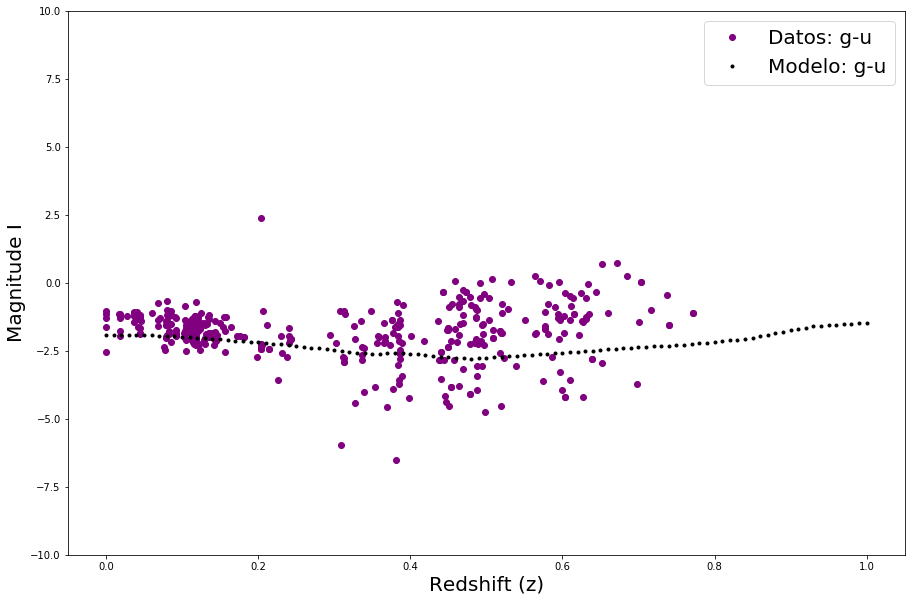

In [275]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_u[only_galaxies], 'o', label='Datos: g-u', color='purple')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_u[only_good_redshift], '.', label='Modelo: g-u', color='black')
plt.xlabel('Redshift (z)', size=20)
plt.ylabel('Magnitude I', size=20)
plt.ylim(-10,10)
plt.legend(fontsize=20)
plt.show()

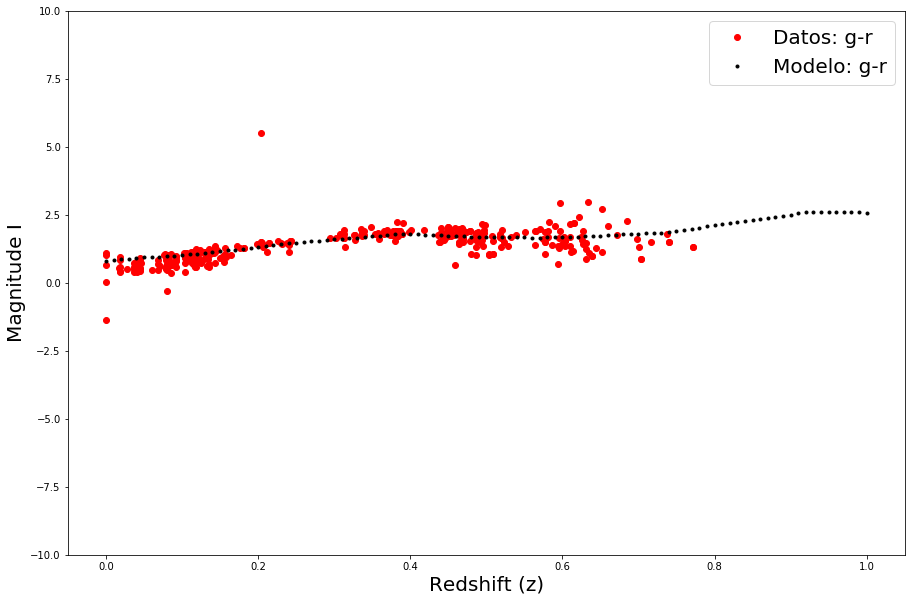

In [270]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_r[only_galaxies], 'o', label='Datos: g-r', color='red')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_r[only_good_redshift], '.', label='Modelo: g-r', color='black')
plt.xlabel('Redshift (z)', size=20)
plt.ylabel('Magnitude I', size=20)
plt.ylim(-10,10)
plt.legend(fontsize=20)
plt.show()

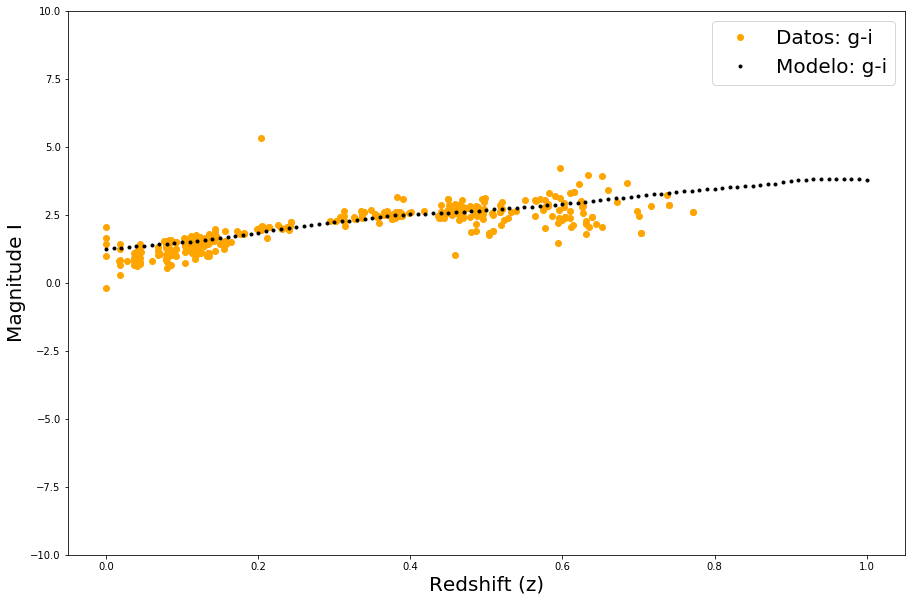

In [272]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_i[only_galaxies], 'o', label='Datos: g-i', color='orange')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_i[only_good_redshift], '.', label='Modelo: g-i', color='black')
plt.xlabel('Redshift (z)', size=20)
plt.ylabel('Magnitude I', size=20)
plt.ylim(-10,10)
plt.legend(fontsize=20)
plt.show()

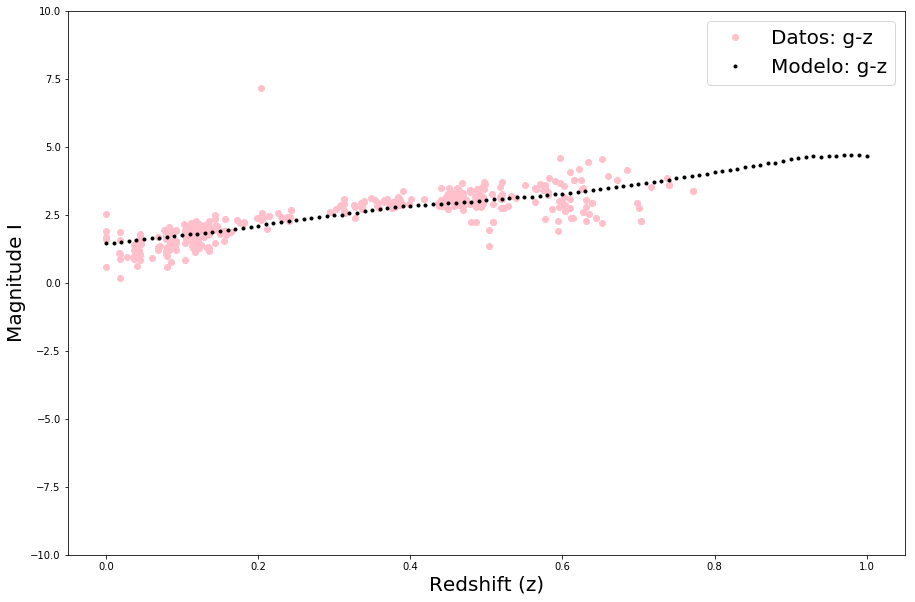

In [277]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_z[only_galaxies], 'o', label='Datos: g-z', color='pink')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_z[only_good_redshift], '.', label='Modelo: g-z', color='black')
plt.xlabel('Redshift (z)', size=20)
plt.ylabel('Magnitude I', size=20)
plt.ylim(-10,10)
plt.legend(fontsize=20)
plt.show()

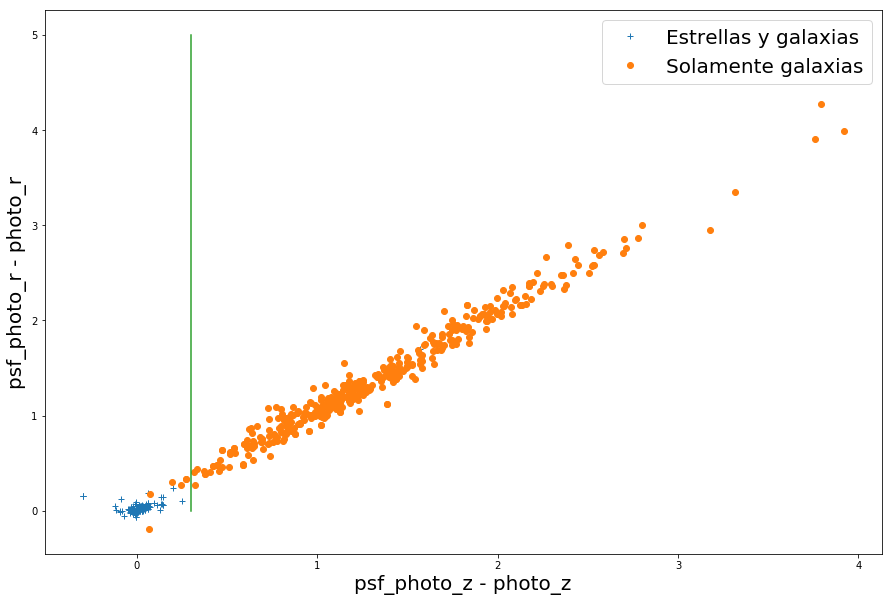

In [234]:
plt.figure(figsize=(15,10))
plt.plot(psf_photo_z - photo_z, psf_photo_r - photo_r ,'+', label='Estrellas y galaxias') 
plt.plot(psf_photo_z[only_galaxies] - photo_z[only_galaxies], psf_photo_r[only_galaxies]- photo_r[only_galaxies] ,'o', label='Solamente galaxias') 
plt.plot([0.3,0.3],[0,5])
plt.xlabel('psf_photo_z - photo_z', size=20)
plt.ylabel('psf_photo_r - photo_r', size=20)
plt.legend(fontsize=20)
plt.show()

In [20]:
whatever = np.zeros(len(type_object))

In [82]:
index=16
array_chi2 = 1./3 * (color_gu[only_good_redshift] - (photo_g[index] - photo_u[index]))**2 / error_color_gu[index]**2 \
                      + (color_gr[only_good_redshift] - (photo_g[index] - photo_r[index]))**2 / error_color_gr[index]**2 \
                      + (color_gi[only_good_redshift] - (photo_g[index] - photo_i[index]))**2 / error_color_gi[index]**2 \
                      + (color_gz[only_good_redshift] - (photo_g[index] - photo_z[index]))**2 / error_color_gz[index]**2

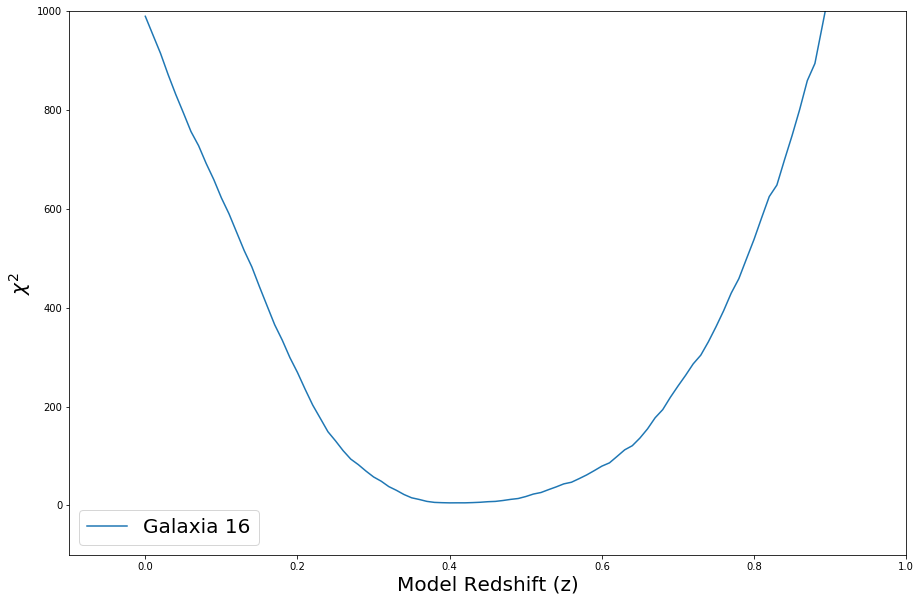

In [235]:
plt.figure(figsize=(15,10))
plt.plot(model_redshift[only_good_redshift],array_chi2, label='Galaxia 16')
plt.xlabel('Model Redshift (z)',size=20)
plt.ylabel('$\chi^2$',size=20)
plt.xlim(-0.1,1)
plt.ylim(-100,1000)
plt.legend(fontsize=20)
plt.show()

In [80]:
for ii in range(len(model_redshift)):
    
    index = only_red_galaxies[ii]
    
    array_chi2 = 1./3 * (color_gu[only_good_redshift] - (photo_g[index] - photo_u[index]))**2 / error_color_gu[index]**2 \
                      + (color_gr[only_good_redshift] - (photo_g[index] - photo_r[index]))**2 / error_color_gr[index]**2 \
                      + (color_gi[only_good_redshift] - (photo_g[index] - photo_i[index]))**2 / error_color_gi[index]**2 \
                      + (color_gz[only_good_redshift] - (photo_g[index] - photo_z[index]))**2 / error_color_gz[index]**2
    
    smallest_chi2_index = np.argmin(array_chi2)
    
    whatever[index] = model_redshift[smallest_chi2_index]

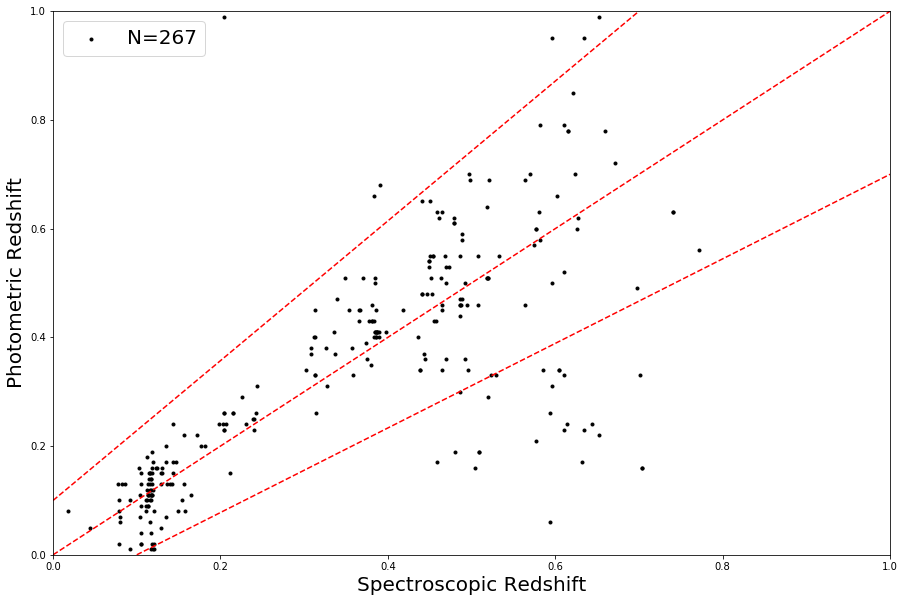

In [239]:
plt.figure(figsize=(15,10))
plt.scatter(spec_redshift[pls], whatever[pls], marker='.', color='black', label='N=267')
plt.xlabel('Spectroscopic Redshift', size=20)
plt.ylabel('Photometric Redshift', size=20)
plt.plot([0,1],[0,1], '--', color='red')
plt.plot([0,0.70],[0.1,1], '--', color='red')
plt.plot([0.1,1],[0,0.70], '--', color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(fontsize=20)
plt.show()

Text(0.5,0,u'Photometric Redshift - Spectroscopic Redshift')

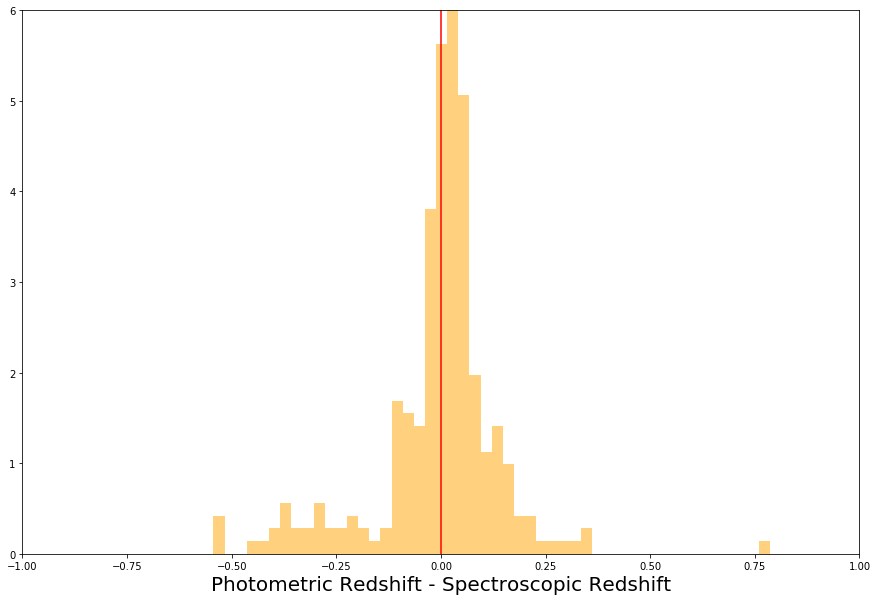

In [261]:
plt.figure(figsize=(15,10))
plt.hist(whatever[pls]-spec_redshift[pls], 50, normed=1, alpha=0.5, facecolor='orange')
plt.axis([-1, 1, 0, 6])
plt.plot([0,0],[0,6], color='red')
plt.xlabel('Photometric Redshift - Spectroscopic Redshift', size=20)

### 2. Using the "idlsave" package, read the model magnitudes for $z_f = 0.7$ and $z_f = 0.5$ and plot the colors $g-u$, $g-r$, $g-i$, and $g-z$ for redshift between 0 and 1. 

### 3. Overplot the colors of the galaxies you get for the red galaxies for the 2 different models.